<a href="https://colab.research.google.com/github/debora-ns/Base-de-dados-Biblioteca/blob/main/Analise_Pre%C3%A7o_Im%C3%B3veis_SP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto prático nº2** - *Análise de Variação de Preço de Imóveis em SP*

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Carregue seus dados (substitua pelo caminho correto)
dados = pd.read_csv("base-alugueis-sp.csv")

# Selecione as colunas relevantes (área e preço do aluguel)
area = dados["area"]
preco_aluguel = dados["rent"]

# Ajuste do modelo (coeficiente angular)
coef_angular = np.cov(area, preco_aluguel)[0, 1] / np.var(area)

# Coeficiente linear (intercepto)
coef_linear = np.mean(preco_aluguel) - coef_angular * np.mean(area)

# Solicite ao usuário que insira a área do imóvel
area_prevista = float(input("Digite a área do imóvel (em metros quadrados): "))

# Previsão do preço do aluguel
preco_previsto = coef_linear + coef_angular * area_prevista

print(f"Preço previsto para uma área de {area_prevista:.2f} m²: R$ {preco_previsto:.2f}")


Digite a área do imóvel (em metros quadrados): 70
Preço previsto para uma área de 70.00 m²: R$ 2900.63


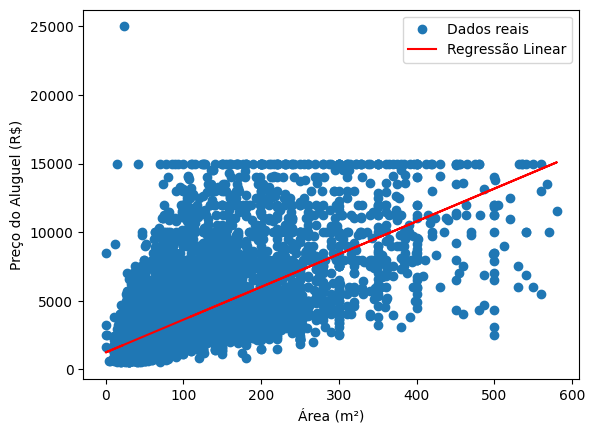

In [11]:
# Visualização dos dados e da reta de regressão
plt.scatter(area, preco_aluguel, label="Dados reais")
plt.plot(area, coef_linear + coef_angular * area, color='red', label="Regressão Linear")
plt.xlabel("Área (m²)")
plt.ylabel("Preço do Aluguel (R$)")
plt.legend()
plt.show()

In [21]:
# Agrupe os dados por distrito e calcule a média do preço de aluguel
media_por_distrito = dados.groupby("district")["rent"].mean()

# Exiba a média por distrito
print(media_por_distrito)

district
Aclimação                                                  2810.260000
Adalgisa                                                   7275.500000
Agua Branca                                                2435.000000
Alphaville                                                11247.458333
Alphaville Centro Industrial E Empresarial/alphaville.     6300.000000
                                                              ...     
Várzea da Barra Funda                                      3608.909091
Água Branca                                                3774.045455
Água Fria                                                  3721.800000
Água Funda                                                 3000.000000
Água Rasa                                                  2845.894737
Name: rent, Length: 1199, dtype: float64


In [5]:
# Fazendo análise descritiva
dados.describe().round(2)

,area,bedrooms,garage,rent,total
count,11657.00,11657.00,11657.00,11657.00,11657.00
mean,84.66,1.97,1.06,3250.81,4080.03
std,74.02,0.93,1.13,2650.71,3352.48
min,0.00,0.00,0.00,500.00,509.00
25%,40.00,1.00,0.00,1590.00,1996.00
50%,60.00,2.00,1.00,2415.00,3057.00
75%,96.00,3.00,2.00,3800.00,4774.00
max,580.00,6.00,6.00,25000.00,28700.00


In [6]:
#Verificando o tamanho do Dataset
dados.shape

(11657, 8)

In [7]:
#Para analisar a matriz de correlação, precisamos extrair apenas as colunas com valores numéricos
#Selecionando apenas as colunas numéricas
colunas_numericas = ["area", "bedrooms", "garage", "rent", "total"]
dados_numericos = dados[colunas_numericas]

#Calculando a matriz de correlação
matriz_correlacao = dados_numericos.corr().round(4)
print(matriz_correlacao)

            area  bedrooms  garage    rent   total
area      1.0000    0.7279  0.7334  0.6672  0.6521
bedrooms  0.7279    1.0000  0.6569  0.5312  0.5260
garage    0.7334    0.6569  1.0000  0.6173  0.6180
rent      0.6672    0.5312  0.6173  1.0000  0.9781
total     0.6521    0.5260  0.6180  0.9781  1.0000
